In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integral

from prettytable import PrettyTable
from matplotlib import style
style.use("seaborn")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10748\303542804.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn")


In [3]:
def midpointRule(F, a, b, n):
  h = float(b-a)/n
  result =0
  for i in range(n):
    result += F((a + h/2) + i*h)
    result *= h
  return format(result, '.16f')

# Trapezoidal Rule
def trapezoidalRule(F,a,b,n):
  h = float(b-a)/n
  f_sum = 0
  for i in range(1, n, 1):
    x = a + i * h
    f_sum = f_sum + f(x)
  return format((h * (0.5 * f(a) + f_sum + 0.5 * f(b))), '.16f')

# Simpson Rule
def simpsonRule(F,a,b,n):
  h = float(b-a) / n
  result = F(a) + F(b)
  for i in range(1, n, 1):
    if(i % 2 == 0):
      result = result + (2*(f(a+i*h)))
    else :
      result = result + (4*(f(a+i*h)))
  result *= (h/3)
  return format(result, '.16f')

# Definite Integral
def defIntegral(F,a,b):
  result = integral.quad(F, a, b)
  return result

In [4]:
#@title Graph function
#Area integral, dengan matplotlib
import warnings
warnings.filterwarnings("ignore")

def integArea(eq, upperLim, bottomLim, breakUp):
  f = eq
  a = upperLim; b = bottomLim; N = breakUp
  x = np.linspace(a,b,N+1)
  X = np.linspace(a,b,N*N+1)
  do = np.linspace(a,b,1000)
  Y = f(X)


  plt.figure(figsize=(15,5))

  plt.subplot(1,3,1)
  plt.plot(do, f(do), color="#0000ff")
  plt.title('Fungsi f(x)')
  plt.ylim(bottom=0)

  plt.subplot(1,3,2)
  plt.plot(do, f(do), color="#0000ff")
  plt.title('Luas area fungsi f(x)')
  plt.fill_between(do, f(do), where=[(do >= a) and (do <= b) for do in do], color="#0f0f0f50")
  plt.ylim(bottom=0)

In [5]:
def answerQuestion(f, a, b, nz):
  mine = PrettyTable()
  mine.field_names = ["n","Trapezoidal Rule", "Midpoint Rule", "Simpson Rule","Error Simpson Rule"]
  mine.align["n"] = "r" 
  mine.align["Trapezoidal Rule"] = "c" 
  mine.align["Simpson Rule"] = "c" 
  mine.align["Midpoint Rule"] = "c" 
  mine.align["Error Simpson Rule"] = "c"
  print("Luas area f(x) sebenarnya = " + str(defIntegral(f,a,b)[0]))
  integArea(f, a, b, nz)
  for i in range (1,11):  
    n = 2**i
    t = trapezoidalRule(f, a, b, n)
    s = simpsonRule(f, a, b, n)
    m = midpointRule(f, a, b, n)
    x = defIntegral(f,a,b)[0]
    error = abs((x-float(s))/x)
    error = format(error, '.16f') + " %"
    mine.add_row([n,t,m,s,error])
  print(mine)

Luas area f(x) sebenarnya = 15.084944665313007
+------+---------------------+---------------------+---------------------+----------------------+
|    n |   Trapezoidal Rule  |    Midpoint Rule    |     Simpson Rule    |  Error Simpson Rule  |
+------+---------------------+---------------------+---------------------+----------------------+
|    2 | 13.6568542494923797 | 32.4253759691022339 | 14.4379028329949186 | 0.0428932188134521 % |
|    4 | 14.5558337350587355 | 44.0921809926793529 | 14.8554935635808540 | 0.0152106028111434 % |
|    8 | 14.8917869636626250 | 15.1384699438428783 | 15.0037713731972566 | 0.0053810798724641 % |
|   16 | 15.0151284537527516 |  2.6888947966461032 | 15.0562422837827938 | 0.0019027170577703 % |
|   32 | 15.0598795879086378 |  0.9303971693246542 | 15.0747966326272689 | 0.0006727258807301 % |
|   64 | 15.0759874826369735 |  0.4020245067181593 | 15.0813567808797515 | 0.0002378453824564 % |
|  128 | 15.0817539875010063 |  0.1881438524714509 | 15.083676155789016

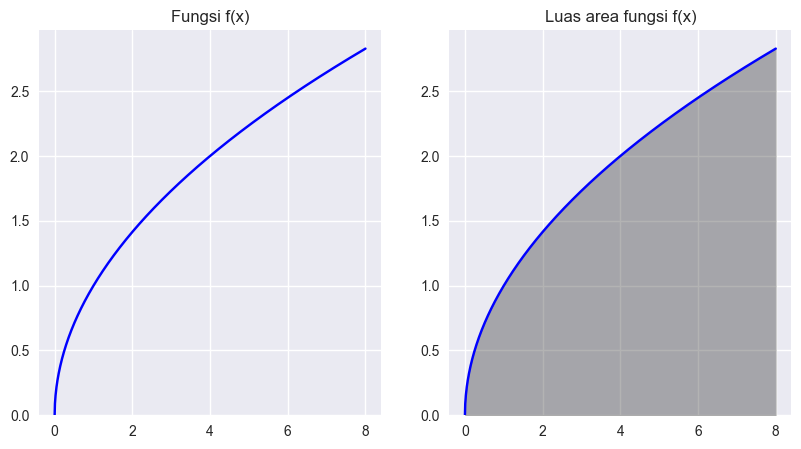

In [6]:
def f(x):
  return np.sqrt(x)

a = 0
b = 8
n = 4 #Untuk Grafik Fungsi F(x)

answerQuestion(f, a, b, n)

Luas area f(x) sebenarnya = 1.718281828459045
+------+--------------------+--------------------+--------------------+----------------------+
|    n |  Trapezoidal Rule  |   Midpoint Rule    |    Simpson Rule    |  Error Simpson Rule  |
+------+--------------------+--------------------+--------------------+----------------------+
|    2 | 1.7539310924648253 | 1.3795063624782729 | 1.7188611518765928 | 0.0003371527347567 % |
|    4 | 1.7272219045575166 | 0.7436447978294900 | 1.7183188419217470 | 0.0000215409731331 % |
|    8 | 1.7205185921643018 | 0.3587760155660256 | 1.7182841546998970 | 0.0000013538179904 % |
|   16 | 1.7188411285799945 | 0.1749366807418603 | 1.7182819740518918 | 0.0000000847316454 % |
|   32 | 1.7184216603163267 | 0.0862414646443016 | 1.7182818375617714 | 0.0000000052975747 % |
|   64 | 1.7183167868500941 | 0.0428010225887933 | 1.7182818290280153 | 0.0000000003311274 % |
|  128 | 1.7182905680834779 | 0.0213190420931653 | 1.7182818284946058 | 0.0000000000206955 % |
|  2

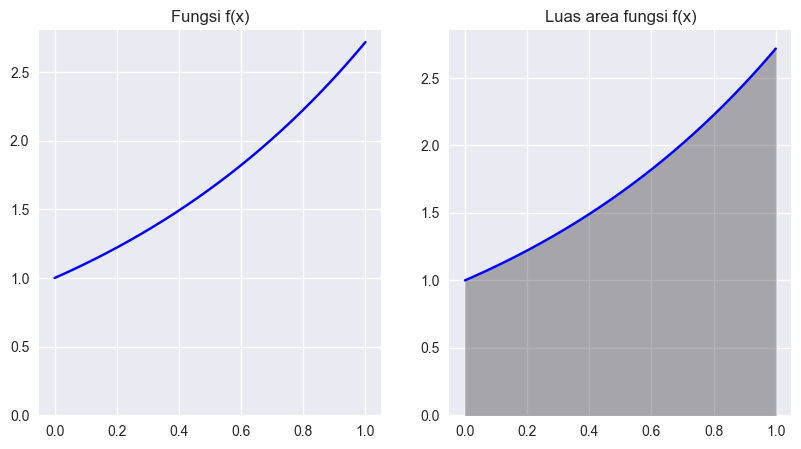

In [7]:
def f(x):
  return np.e**x

a = 0
b = 1
n = 4 #Untuk Grafik Fungsi F(x)

answerQuestion(f, a, b, n)